In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# EDA

In [4]:
data=pd.read_csv("Toyota_Data.csv")
data.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB


In [12]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index('Date', inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

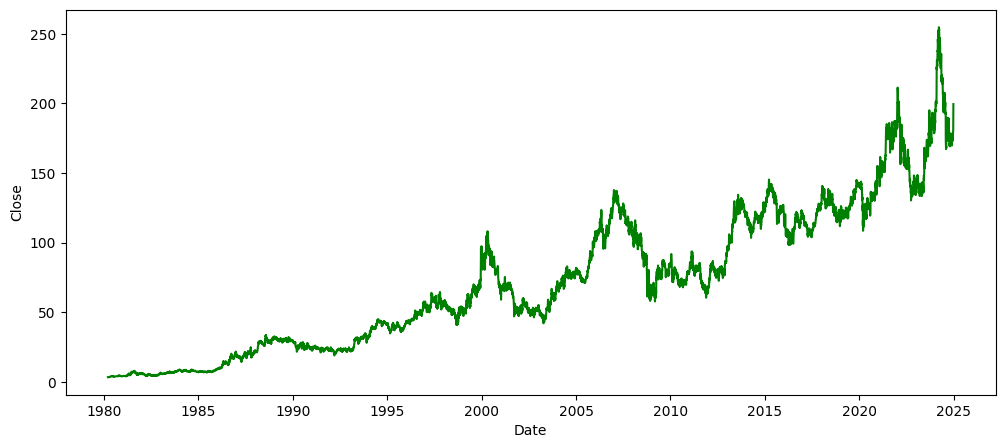

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data,color="green")

# Data Prerpocessing

In [14]:
df=data[["Close"]].values

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [19]:
def create_sequence (df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i, 0])
        y.append(df[i,0])
    return np.array(X),np.array(y)    

In [20]:
sequence_length=10

In [21]:
X,y=create_sequence(scaler_data,sequence_length)

In [22]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(11281, 10, 1) (11281,)


# LSTM Model

In [23]:
model=Sequential()

In [24]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.add(Dropout(0.2))

In [26]:
model.add(Dense(1))

In [28]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0098
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9217e-04
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6575e-04
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4047e-04
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0747e-04
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7011e-04
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4114e-04
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0296e-04
Epoch 12/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1339e-04
Epoch 13/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3189e-04
Epoch 14/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4868e-04
Epo

# Model Evaluation

In [31]:
loss=model.evaluate(X,y)
print("Model Loss:",loss)

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 4.4215e-05
Model Loss: 6.245801341719925e-05


# Model Prediction

In [34]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
[[5.111334 ]
 [5.105022 ]
 [5.0819373]
 [5.059314 ]
 [5.0441227]
 [5.0322824]
 [5.0236955]
 [5.054198 ]
 [5.0835414]
 [5.0990777]]


In [35]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

# Actual Vs Predicted

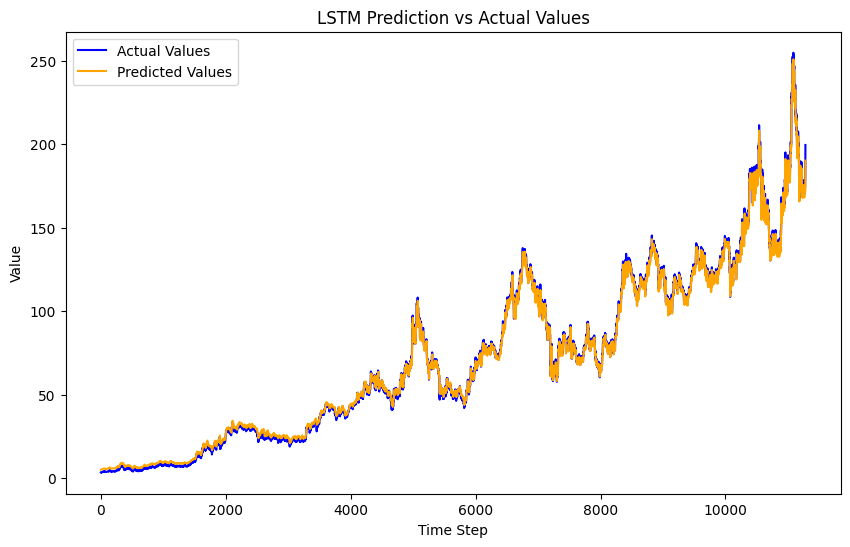

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()